In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv('/content/Interest_rate_1.csv')

In [4]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployeement_rate,index_price
0,0,NaN,2017,2.75,5.3,1464
1,1,NaN,2017,2.50,5.3,1394
2,2,NaN,2017,2.50,5.3,1357
3,3,NaN,2017,2.50,5.3,1293
4,4,NaN,2017,2.50,5.4,1256


In [12]:
#drop unwanted columns
df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [13]:
df.head()

,interest_rate,unemployeement_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [16]:
#any null value
df.isnull().sum()

,0
interest_rate,0
unemployeement_rate,0
index_price,0


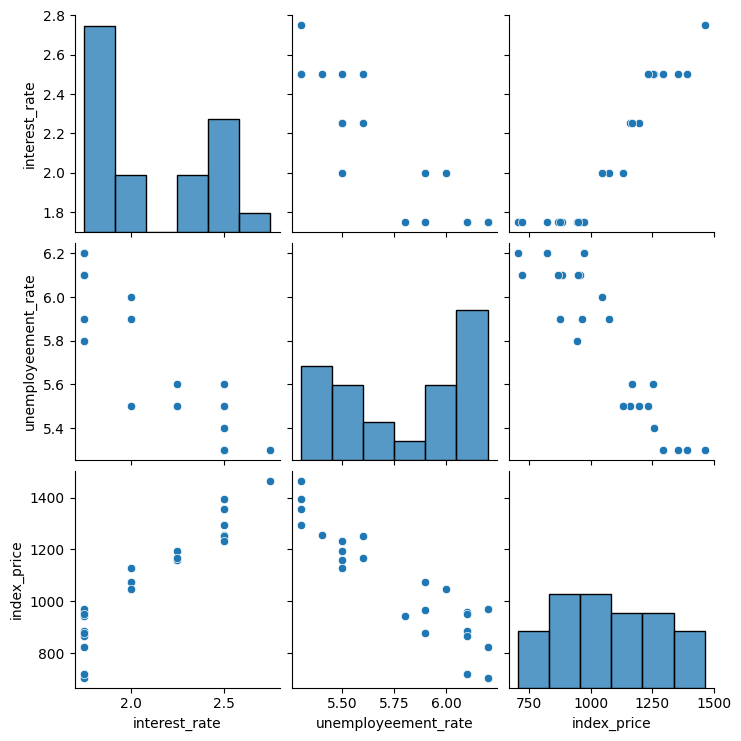

In [17]:
#visualize the data
sns.pairplot(df)

In [18]:
#Correlation()
df.corr()

,interest_rate,unemployeement_rate,index_price
interest_rate,1.000000,-0.908015,0.935793
unemployeement_rate,-0.908015,1.000000,-0.917401
index_price,0.935793,-0.917401,1.000000


Text(0, 0.5, 'unemployeement_rate')

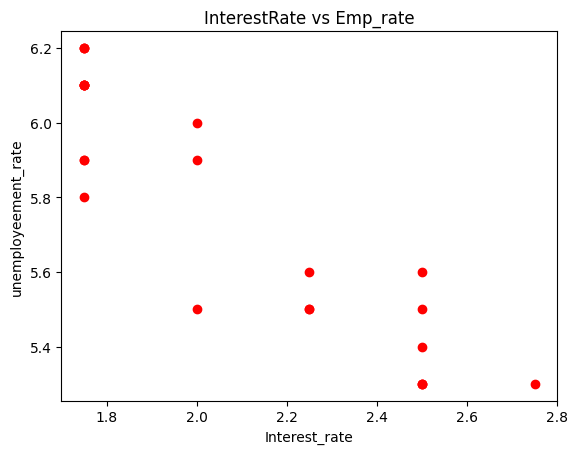

In [23]:
#Visualize the data points
plt.scatter(df['interest_rate'],df['unemployeement_rate'],color='r')
plt.title("InterestRate vs Emp_rate")
plt.xlabel("Interest_rate")
plt.ylabel("unemployeement_rate")

In [25]:
#split independent and dependent features
X = df.iloc[:,:-1]
X

,interest_rate,unemployeement_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [27]:
y = df.iloc[:,-1]
y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [28]:
#Train split and test
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
#dataPreprocessing or Standarization
from sklearn.preprocessing import StandardScaler


In [35]:
scaler = StandardScaler()

In [41]:
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.55339859, -0.49081499],
       [-0.9486833 ,  0.44173349],
       [ 1.30443953, -1.42336348],
       [-0.9486833 ,  1.37428198],
       [ 1.30443953, -0.49081499],
       [ 1.30443953, -1.42336348],
       [-0.19764235,  0.75258299],
       [-0.9486833 ,  1.06343249],
       [ 1.30443953, -1.42336348],
       [ 1.30443953, -1.11251398],
       [-0.9486833 ,  1.37428198],
       [-0.9486833 ,  1.06343249],
       [-0.9486833 ,  0.44173349],
       [-0.9486833 ,  1.06343249],
       [ 0.55339859, -0.80166449],
       [-0.19764235, -0.80166449],
       [-0.9486833 ,  0.130884  ],
       [-0.9486833 ,  1.06343249],
       [ 1.30443953, -0.80166449]])

In [44]:
X_test = scaler.transform(X_test)
X_test

array([[2.25, 5.5 ],
       [1.75, 6.2 ],
       [2.75, 5.3 ],
       [1.75, 6.1 ],
       [2.  , 5.9 ]])

In [45]:
#creating model
from sklearn.linear_model import LinearRegression

In [46]:
regression  = LinearRegression()

In [47]:
regression.fit(X_train,Y_train)

LinearRegression()

In [50]:
#Cross Validation
from sklearn.model_selection import cross_val_score

In [51]:
val_score = cross_val_score(regression,X_train,Y_train,scoring="neg_mean_squared_error",cv=3)

In [54]:
np.mean(val_score)

-5574.909733977219

In [56]:
# check model with new data
y_pred = regression.predict(X_test)
y_pred

array([680.87349161, 558.09539983, 749.83372362, 568.85897178,
       614.10265974])

In [57]:
#performance meterics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [58]:
mse = mean_squared_error(y_pred,Y_test)
mae = mean_absolute_error(y_pred,Y_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

244173.77261968254
476.24715068148816
494.1394262955371


In [59]:
#RSquared
from sklearn.metrics import r2_score

In [63]:
score = r2_score(y_pred,Y_test)
print(score)

-45.92992650282113


In [66]:
#Adjusted_Rsquare
print(1-(1-score)*len(Y_test)-1/len(Y_test)-X_test.shape[1]-1)

-236.84963251410565


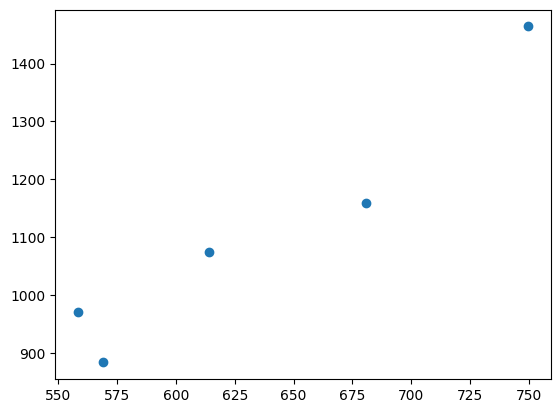

In [67]:
#Finally I wanted to perform my model is performing well or not by using ##Asumptions
plt.scatter(y_pred,Y_test)
##If my predction values and output values It follows some linear relation ship then my model is performing well

In [68]:
#Resiudals
residuals = Y_test-y_pred
print(residuals) ###these values i get is errors

8     478.126508
16    412.904600
0     714.166276
18    315.141028
11    460.897340
Name: index_price, dtype: float64


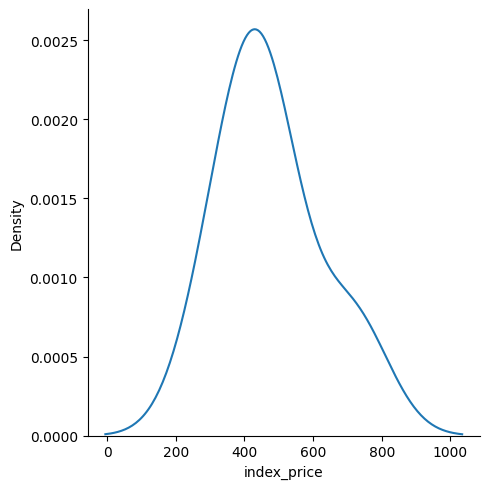

In [73]:
#ploting my residuals
sns.displot(residuals,kind='kde') #if this kind of bellcurve means NormalDistribution you getting that means model you created is good..!

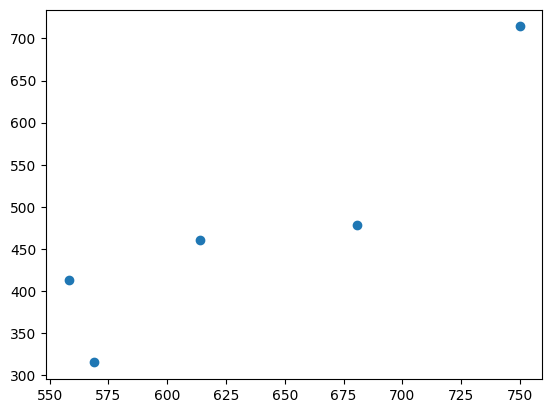

In [74]:
#scatter plot with respect prediciton and residuals
plt.scatter(y_pred,residuals) ###data is uniformly distributed means distributed everywhere means model we created is good